<a href="https://colab.research.google.com/github/Pratham8888/PersonalAnalytics/blob/main/Iris_flowerspecies_identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# Import our main tools
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the iris dataset
iris = load_iris()

# Create a Pandas DataFrame from the data
# The features (measurements) are in iris.data
# The target (species) is in iris.target
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

# Let's see the first 5 rows of our data
print("Here is a preview of the data:")
print(df.head())

# Let's see what the species numbers mean
print("\nSpecies Key:")
print({i: name for i, name in enumerate(iris.target_names)})

Here is a preview of the data:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  

Species Key:
{0: np.str_('setosa'), 1: np.str_('versicolor'), 2: np.str_('virginica')}


Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB

Statistical Summary:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%            

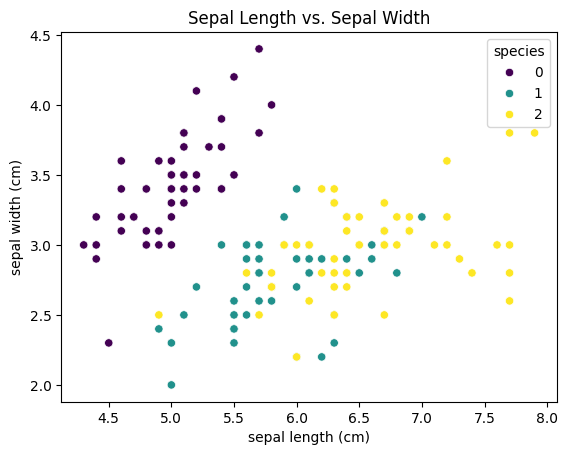

In [8]:
# Import the seaborn library for beautiful visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# Get a quick summary of the data
print("Data Information:")
df.info()

print("\nStatistical Summary:")
print(df.describe())


# --- Let's create our first visualization! ---
# We will make a scatter plot of sepal length vs. sepal width
# We'll color each dot based on its species to see if there are patterns.

print("\nCreating a scatter plot...")
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='species', data=df, palette='viridis')
plt.title('Sepal Length vs. Sepal Width')
plt.show() # This command displays the plot

In [9]:
# Separate our data into features (X) and target (y)
# X contains all columns EXCEPT the 'species' column
X = df.drop('species', axis=1)

# y contains ONLY the 'species' column
y = df['species']


# Split the data into training and testing sets
# We'll use 80% for training and 20% for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Let's see how many samples are in each set
print("Number of samples in our Training Set:", len(X_train))
print("Number of samples in our Testing Set:", len(X_test))

Number of samples in our Training Set: 120
Number of samples in our Testing Set: 30


In [10]:
# Create our machine learning model
# We'll choose the K-Nearest Neighbors classifier and set k=3
model = KNeighborsClassifier(n_neighbors=3)

# --- This is the most important step ---
# Train the model using our training data (X_train and y_train)
model.fit(X_train, y_train)

print("Training complete!")
print("The model has learned the patterns from the 120 training samples.")

Training complete!
The model has learned the patterns from the 120 training samples.


In [11]:
# Use our trained model to make predictions on the test data
predictions = model.predict(X_test)

# Let's see what the model predicted for the 30 test flowers
print("Model Predictions:", predictions)

# Let's see what the actual correct answers were
print("Actual Answers:   ", y_test.to_numpy())


# Now, let's compare the predictions to the actual answers to get our accuracy
accuracy = accuracy_score(y_test, predictions)

print("\nModel Accuracy on the Test Set:")
print(f"{accuracy:.2%}") # This formats the number as a percentage

Model Predictions: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Actual Answers:    [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]

Model Accuracy on the Test Set:
100.00%
